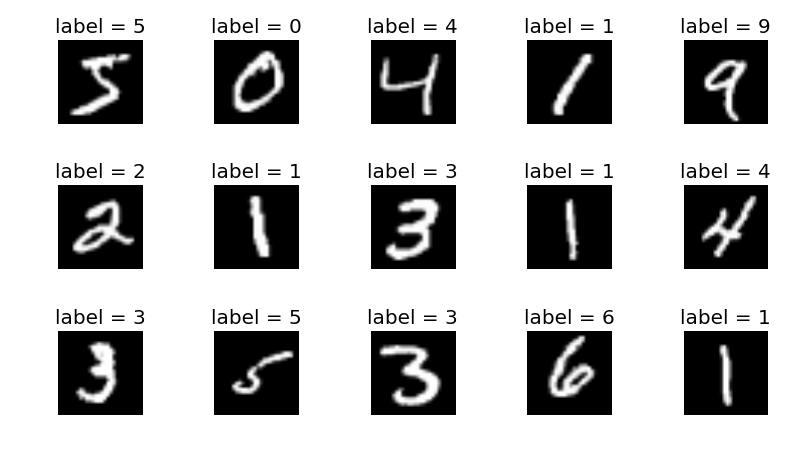

https://towardsdatascience.com/improving-accuracy-on-mnist-using-data-augmentation-b5c38eb5a903

In [7]:
import numpy as np
import gzip
import struct

def load_digits(file_name):    
    with gzip.open(file_name, 'rb') as f:
        # magic_number = struct.unpack('>I', f.read(4))
        # number_of_images = struct.unpack('>I', f.read(4))
        # number_of_rows = struct.unpack('>I', f.read(4))
        # number_of_columns = struct.unpack('>I', f.read(4))
        _cache, img_n, rows, cols = struct.unpack('>IIII', f.read(16))
        all_images = np.frombuffer(f.read(), dtype=np.uint8)
        return all_images.reshape(img_n, rows * cols)
    
    
def add_bias(X):
    return np.insert(X, 0, 1, axis=1)

def get_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        f.read(8)
        all_labels = f.read()
        return np.frombuffer(all_labels, dtype=np.uint8).reshape(-1,1)


In [8]:
X_train = add_bias(load_digits("train-images-idx3-ubyte.gz"))
X_test = add_bias(load_digits("t10k-images-idx3-ubyte.gz"))

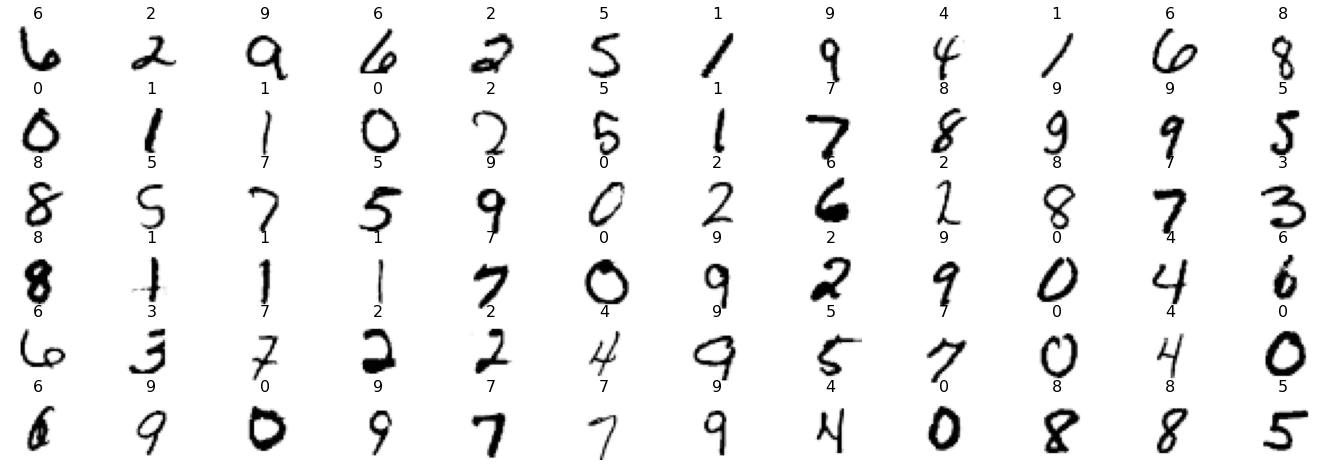

In [9]:
import matplotlib.pyplot as plt
import random

X = load_digits("train-images-idx3-ubyte.gz")
Y = get_labels("train-labels-idx1-ubyte.gz")

fig = plt.figure(figsize=(24,8))
for i in range(6*12):
    ax = fig.add_subplot(6, 12, i + 1)
    ax.axis('off')
    index = random.randint(0, X.shape[0])
    ax.set_title(Y[index,0], fontsize="16")
    ax.imshow(X[index].reshape((28,28)), cmap="Greys")
plt.show()

In [10]:
Y[:5]

array([[5],
       [0],
       [4],
       [1],
       [9]], dtype=uint8)

In [11]:
def encoding(Y):
    number_of_observations = Y.shape[0]
    number_of_classes = 2 
    one_hot_encoded_Y = np.zeros((number_of_observations, number_of_classes))
    for i in range(number_of_observations):
        one_hot_encoded_Y[i][Y[i]]=1
        
    return one_hot_encoded_Y



In [12]:
X_train = add_bias(load_digits("train-images-idx3-ubyte.gz"))
Y_train = encoding(get_labels("train-labels-idx1-ubyte.gz"))
X_test = add_bias(load_digits("t10k-images-idx3-ubyte.gz"))
Y_test = get_labels("t10k-labels-idx1-ubyte.gz")
Y_test_encoded = encoding(get_labels("t10k-labels-idx1-ubyte.gz"))

IndexError: index 5 is out of bounds for axis 0 with size 2

In [13]:
Y_test_encoded[:5]

NameError: name 'Y_test_encoded' is not defined

In [14]:
Y_test[:5]

NameError: name 'Y_test' is not defined

In [15]:
from logistic_model import LogisticRegression


model = LogisticRegression(X_train.shape[1], X_train.shape[0])

model.fit(X_train, Y_train, X_test, Y_test, Y_test_encoded, 10000, 1e-5)

NameError: name 'Y_train' is not defined

IndexError: list index out of range

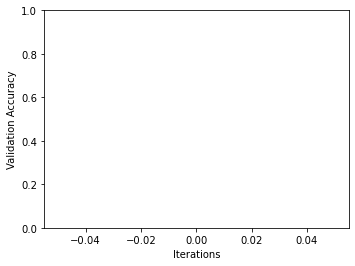

In [16]:
model.plot()

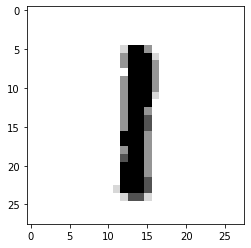

In [17]:
plt.imshow(X_test[2599,1:].reshape((28,28)),cmap="Greys")

In [18]:
Y_test[2598]

NameError: name 'Y_test' is not defined

In [19]:
def magic_sigmoid(z):
    return 1/(1 + np.exp(-z))

def forward_pass(X, w):
    return magic_sigmoid(np.matmul(X, w))

def predict(X, w):
        return np.argmax(forward_pass(X, w))

In [20]:
predict(X_test[2598], model.weights)

0

In [21]:
import csv
import numpy as np

with open("sonar.all-data", 'r') as f:
    data = list(csv.reader(f, delimiter=","))

data = np.array(data)

In [22]:
data[:5]

array([['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986',
        '0.1539', '0.1601', '0.3109', '0.2111', '0.1609', '0.1582',
        '0.2238', '0.0645', '0.0660', '0.2273', '0.3100', '0.2999',
        '0.5078', '0.4797', '0.5783', '0.5071', '0.4328', '0.5550',
        '0.6711', '0.6415', '0.7104', '0.8080', '0.6791', '0.3857',
        '0.1307', '0.2604', '0.5121', '0.7547', '0.8537', '0.8507',
        '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
        '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343',
        '0.0383', '0.0324', '0.0232', '0.0027', '0.0065', '0.0159',
        '0.0072', '0.0167', '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
       ['0.0453', '0.0523', '0.0843', '0.0689', '0.1183', '0.2583',
        '0.2156', '0.3481', '0.3337', '0.2872', '0.4918', '0.6552',
        '0.6919', '0.7797', '0.7464', '0.9444', '1.0000', '0.8874',
        '0.8024', '0.7818', '0.5212', '0.4052', '0.3957', '0.3914',
        '0.3250', '0.3200', '0.3271', '0.2

In [23]:
data.shape

(208, 61)

In [24]:
data_bias = np.insert(data, 0, 1, axis=1)

np.random.seed(1994)
np.random.shuffle(data_bias)

In [25]:
data_bias[:5]

array([['1', '0.0346', '0.0509', '0.0079', '0.0243', '0.0432', '0.0735',
        '0.0938', '0.1134', '0.1228', '0.1508', '0.1809', '0.2390',
        '0.2947', '0.2866', '0.4010', '0.5325', '0.5486', '0.5823',
        '0.6041', '0.6749', '0.7084', '0.7890', '0.9284', '0.9781',
        '0.9738', '1.0000', '0.9702', '0.9956', '0.8235', '0.6020',
        '0.5342', '0.4867', '0.3526', '0.1566', '0.0946', '0.1613',
        '0.2824', '0.3390', '0.3019', '0.2945', '0.2978', '0.2676',
        '0.2055', '0.2069', '0.1625', '0.1216', '0.1013', '0.0744',
        '0.0386', '0.0050', '0.0146', '0.0040', '0.0122', '0.0107',
        '0.0112', '0.0102', '0.0052', '0.0024', '0.0079', '0.0031', 'M'],
       ['1', '0.0257', '0.0447', '0.0388', '0.0239', '0.1315', '0.1323',
        '0.1608', '0.2145', '0.0847', '0.0561', '0.0891', '0.0861',
        '0.1531', '0.1524', '0.1849', '0.2871', '0.2009', '0.2748',
        '0.5017', '0.2172', '0.4978', '0.5265', '0.3647', '0.5768',
        '0.5161', '0.5715', '0.4

In [26]:
X = data_bias[:,0:-1].astype(np.float32)

In [27]:
X[:5]

array([[1.000e+00, 3.460e-02, 5.090e-02, 7.900e-03, 2.430e-02, 4.320e-02,
        7.350e-02, 9.380e-02, 1.134e-01, 1.228e-01, 1.508e-01, 1.809e-01,
        2.390e-01, 2.947e-01, 2.866e-01, 4.010e-01, 5.325e-01, 5.486e-01,
        5.823e-01, 6.041e-01, 6.749e-01, 7.084e-01, 7.890e-01, 9.284e-01,
        9.781e-01, 9.738e-01, 1.000e+00, 9.702e-01, 9.956e-01, 8.235e-01,
        6.020e-01, 5.342e-01, 4.867e-01, 3.526e-01, 1.566e-01, 9.460e-02,
        1.613e-01, 2.824e-01, 3.390e-01, 3.019e-01, 2.945e-01, 2.978e-01,
        2.676e-01, 2.055e-01, 2.069e-01, 1.625e-01, 1.216e-01, 1.013e-01,
        7.440e-02, 3.860e-02, 5.000e-03, 1.460e-02, 4.000e-03, 1.220e-02,
        1.070e-02, 1.120e-02, 1.020e-02, 5.200e-03, 2.400e-03, 7.900e-03,
        3.100e-03],
       [1.000e+00, 2.570e-02, 4.470e-02, 3.880e-02, 2.390e-02, 1.315e-01,
        1.323e-01, 1.608e-01, 2.145e-01, 8.470e-02, 5.610e-02, 8.910e-02,
        8.610e-02, 1.531e-01, 1.524e-01, 1.849e-01, 2.871e-01, 2.009e-01,
        2.748e-01,

In [28]:
Y = data_bias[:, -1].reshape(-1,1)
Y_boolean = (Y=='M').astype(np.int)
Y[:5], Y_boolean[:5]

(array([['M'],
        ['R'],
        ['R'],
        ['M'],
        ['R']], dtype='<U6'),
 array([[1],
        [0],
        [0],
        [1],
        [0]]))

In [29]:
X_train, X_test = np.vsplit(X, [166])
Y_train, Y_test = np.vsplit(Y_boolean, [166])

In [30]:
X_train.shape, X_test.shape

((166, 61), (42, 61))

In [31]:
Y_train = encoding(Y_train)
Y_test_encoded = encoding(Y_test)

In [32]:
Y_train[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [33]:
from logistic_model import LogisticRegression

model_2 = LogisticRegression(X_train.shape[1], X_train.shape[0])
model_2.fit(X_train, Y_train, X_test, Y_test, Y_test_encoded, 10000, 0.1)

TypeError: fit() takes 7 positional arguments but 8 were given

IndexError: list index out of range

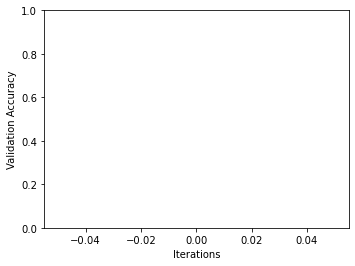

In [34]:
model_2.plot()